Surface Area: 1.2571620390441764
Edge Length: 12.581623997898738


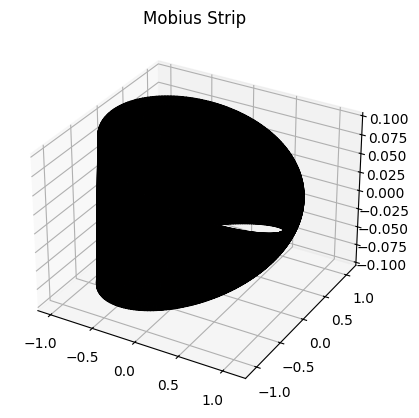

In [2]:
import numpy as np
from scipy.integrate import dblquad
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MobiusStrip:
    def __init__(self, R=1.0, w=0.2, n=100):
        """
        Initialize the Mobius Strip parameters.

        Parameters:
        R : float - Radius from the center of the strip
        w : float - Width of the strip
        n : int   - Resolution (number of mesh points)
        """
        self.R = R
        self.w = w
        self.n = n
        self.u = np.linspace(0, 2 * np.pi, n)
        self.v = np.linspace(-w/2, w/2, n)
        self.U, self.V = np.meshgrid(self.u, self.v)
        self.X, self.Y, self.Z = self._generate_mesh()

    def _generate_mesh(self):
        """
        Generate the 3D coordinates of the Mobius strip using the parametric equation.
        Returns:
        X, Y, Z : ndarray - Coordinates in 3D space
        """
        u, v = self.U, self.V
        x = (self.R + v * np.cos(u / 2)) * np.cos(u)
        y = (self.R + v * np.cos(u / 2)) * np.sin(u)
        z = v * np.sin(u / 2)
        return x, y, z

    def surface_area(self):
        """
        Numerically compute the surface area of the strip using double integration.

        Returns:
        area : float - Approximate surface area
        """
        def integrand(v, u):
            # Partial derivatives of parametric equations w.r.t. u and v
            dx_du = -np.sin(u)*(self.R + v*np.cos(u/2)) - 0.5*v*np.sin(u/2)*np.cos(u)
            dy_du = np.cos(u)*(self.R + v*np.cos(u/2)) - 0.5*v*np.sin(u/2)*np.sin(u)
            dz_du = 0.5*v*np.cos(u/2)

            dx_dv = np.cos(u) * np.cos(u/2)
            dy_dv = np.sin(u) * np.cos(u/2)
            dz_dv = np.sin(u/2)

            # Compute magnitude of the cross product of tangent vectors
            cross = np.sqrt((dy_du*dz_dv - dz_du*dy_dv)**2 +
                            (dz_du*dx_dv - dx_du*dz_dv)**2 +
                            (dx_du*dy_dv - dy_du*dx_dv)**2)
            return cross

        area, _ = dblquad(integrand, 0, 2*np.pi,
                          lambda u: -self.w/2, lambda u: self.w/2)
        return area

    def edge_length(self):
        """
        Approximate the total edge length of the boundary of the strip.

        Returns:
        length : float - Total boundary length
        """
        u = np.linspace(0, 2 * np.pi, self.n)
        v_const = self.w / 2
        # Compute one edge of the strip
        x = (self.R + v_const * np.cos(u / 2)) * np.cos(u)
        y = (self.R + v_const * np.cos(u / 2)) * np.sin(u)
        z = v_const * np.sin(u / 2)
        # Use Euclidean distance between consecutive points
        dx = np.diff(x)
        dy = np.diff(y)
        dz = np.diff(z)
        return 2 * np.sum(np.sqrt(dx**2 + dy**2 + dz**2))  # both edges

    def plot(self):
        """
        Render a 3D plot of the Möbius strip using Matplotlib.
        """
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.X, self.Y, self.Z, rstride=1, cstride=1, color='lightblue', edgecolor='k', alpha=0.9)
        ax.set_title("Mobius Strip")
        plt.show()

# Example usage
if __name__ == "__main__":
    mobius = MobiusStrip(R=1.0, w=0.2, n=200)
    print("Surface Area:", mobius.surface_area())
    print("Edge Length:", mobius.edge_length())
    mobius.plot()
